# 5章

In [32]:
# minimal imports
import pandas as pd
import numpy as np
from plotnine import *
import plotnine.options as p9options

# for graphical enhancement
from mizani.labels import label_date, label_dollar, label_percent, label_comma
from mizani.palettes import brewer_pal
from pysocviz.properties import dcolors

p9options.figure_size = (5.4, 4.8)
theme_set(theme_minimal(base_family='Noto Sans CJK JP'))

In [33]:
# to handle with categorical variables with na
from pysocviz.utils import redefine_cat_with_na

# you may need them If only you are adhere to color determination...
from matplotlib.pylab import cm
from matplotlib.colors import rgb2hex

# dataset packages
from pysocviz.loader import load_dataset
from gapminder import gapminder

gss_sm = load_dataset('gss_sm')
organdata = load_dataset('organdata')
# transform to a categorical variable
organdata['world'] = pd.Categorical(
    organdata['world'].str.replace('nan', 'NA'),
    ['Liberal', 'Corporatist', 'SocDem', 'NA']
)
elections_historic = load_dataset('elections_historic')

## 図 5.2

注: 図 4.9 と同様の理由で, カラーマッピングを手動設定しています.

In [34]:
rel_by_region = gss_sm.assign(
    N=1,
    religion=lambda d: redefine_cat_with_na(d['religion'])
).groupby(['bigregion', 'religion'], observed=False)['N'].count()

rel_by_region = pd.DataFrame(
  {
    'N': rel_by_region,
    'freq': rel_by_region / rel_by_region.reset_index(
      ).groupby(['bigregion'], observed=False)['N'].sum()
  }
).assign(pct=lambda d: (d['freq'] * 100).round(0)).reset_index()

In [35]:
religion_colors = brewer_pal(type='qual', palette='Set1')(gss_sm['religion'].unique().shape[0])
religion_colors = dict(zip(gss_sm['religion'].unique(), religion_colors))
religion_colors['NA'] = '#595959'

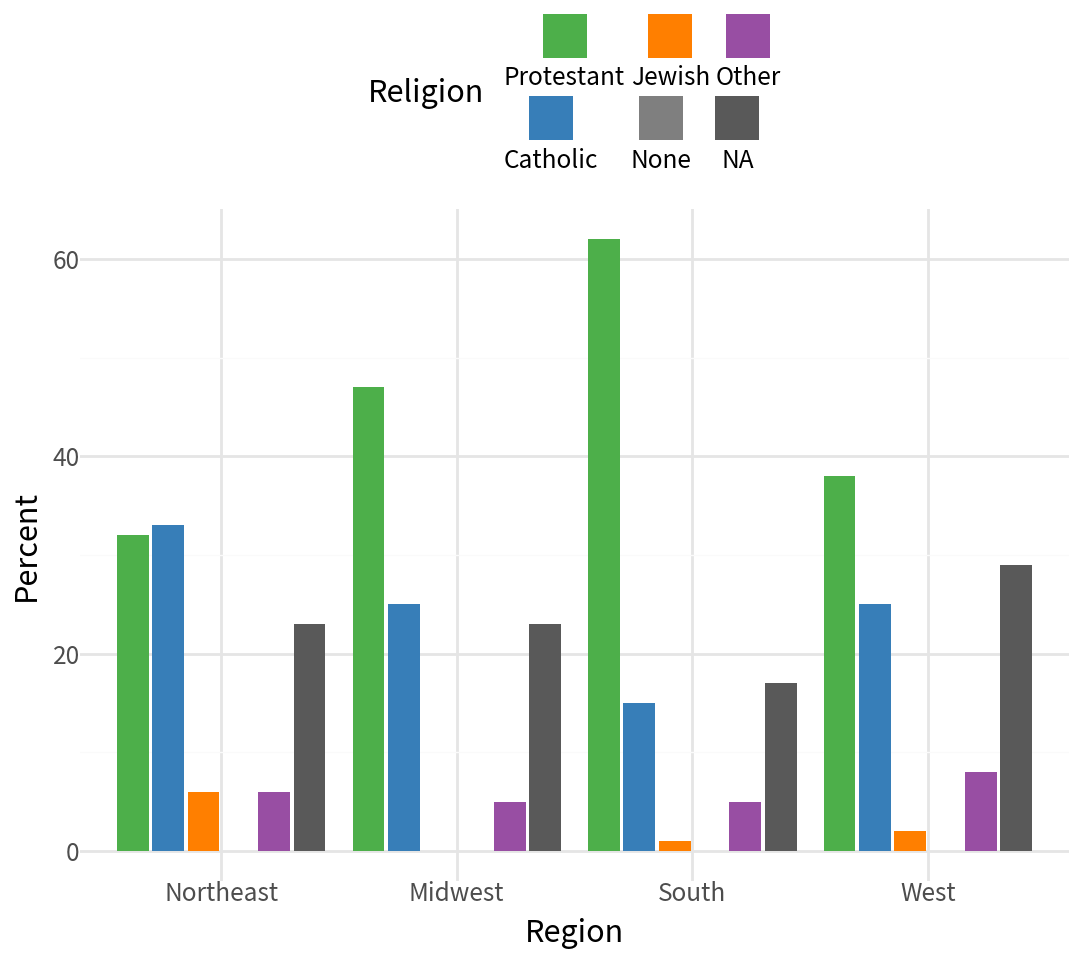

In [36]:
p = ggplot(rel_by_region, aes(x='bigregion', y='pct', fill='religion'))
p + geom_col(position='dodge2') + labs(
  x="Region",
  y="Percent",
  fill="Religion"
) + theme(legend_position="top"
) + scale_fill_manual(religion_colors)

## 図 5.3

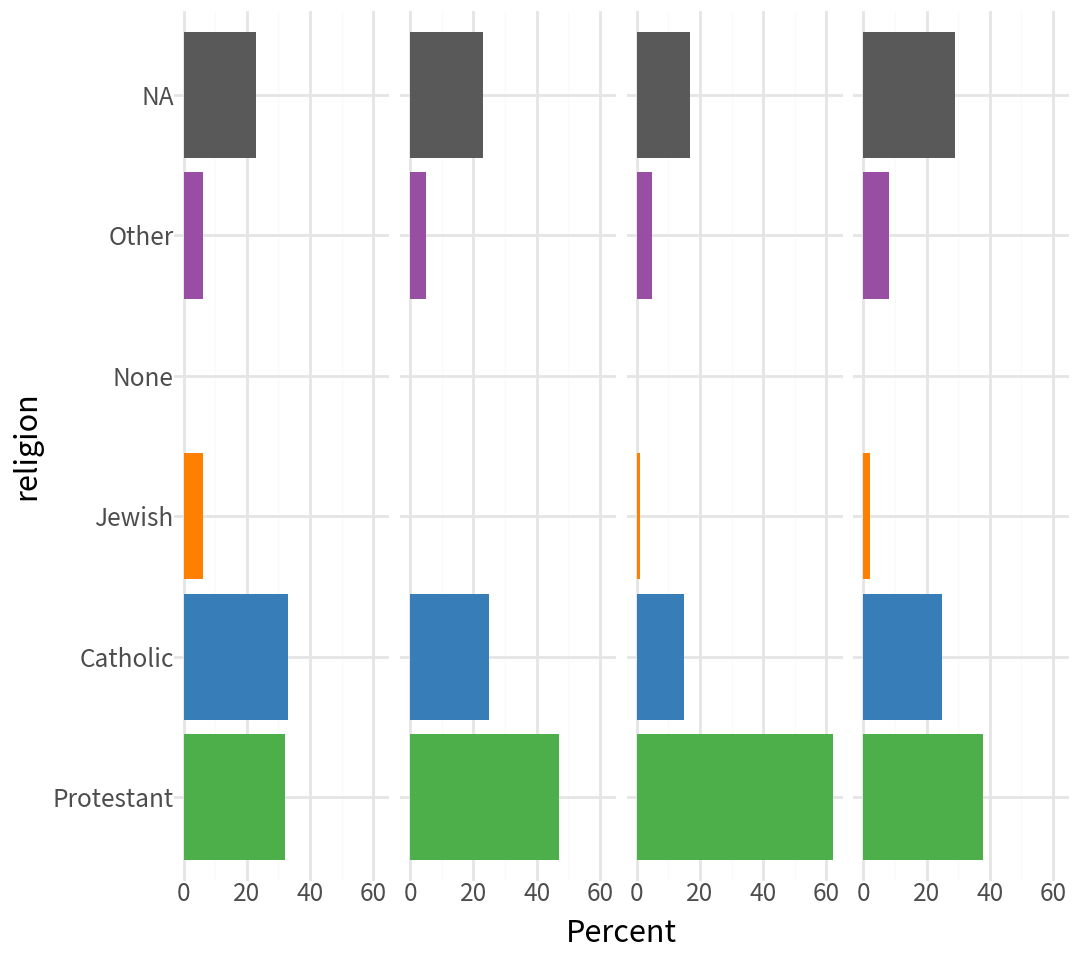

In [37]:
p = ggplot(rel_by_region, aes(x='religion', y='pct', fill='religion'))
p + geom_col(position="dodge2") + labs(
  x=None,
  y="Percent",
  fill="Religion"
) + guides(fill=False) + coord_flip(
) + facet_grid(cols=['bigregion']
) + scale_fill_manual(religion_colors)

## 図 5.4

注: **Plotnine** は現時点では (v0.8) 日付の軸ラベルを適切に自動調整できません. (4章の例では `year` 変数は integer でした). よって, この notebook では `scale_x_date()` に手動で `date_lables` 引数を加えています. `scale_x_date` は `scale_x_datetime` のエイリアスです.

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


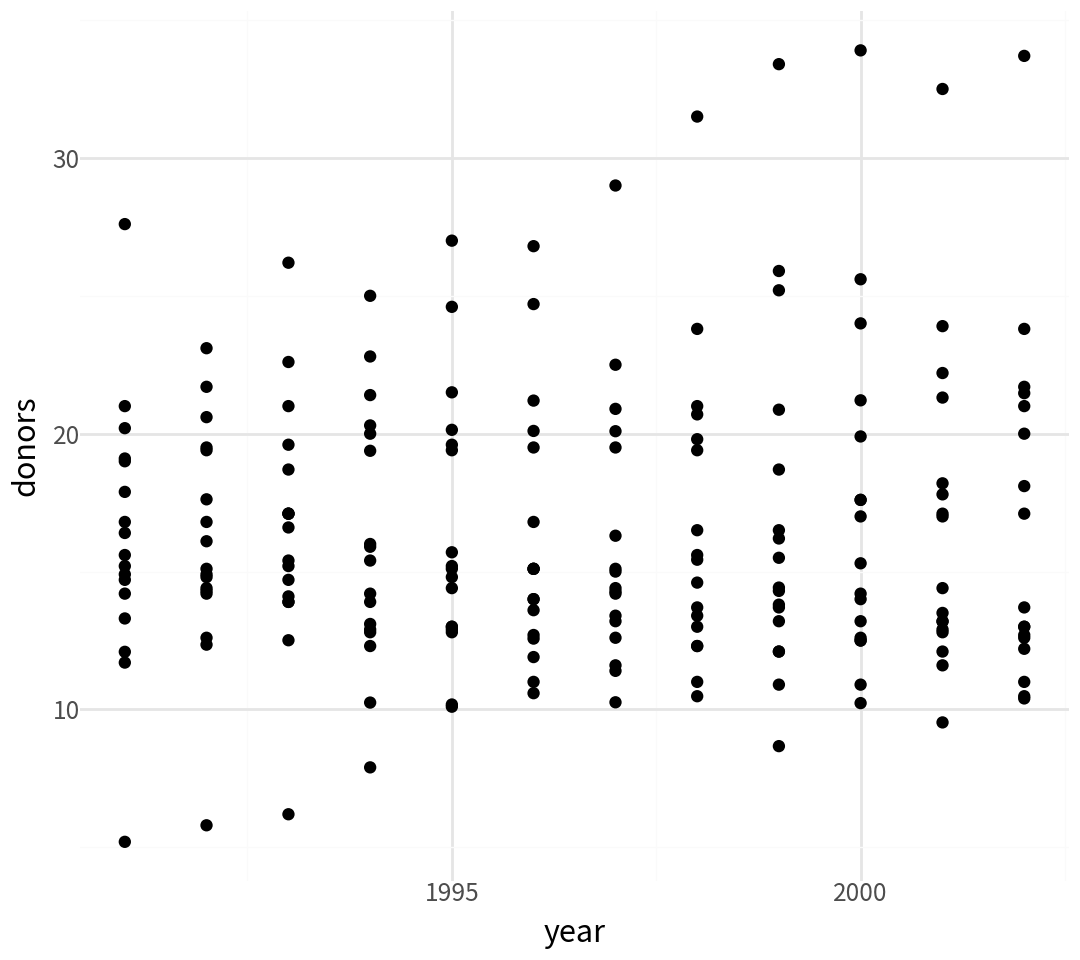

In [38]:
p = ggplot(organdata, aes(x='year', y='donors'))
p + geom_point() + scale_x_date(date_labels='%Y')

## 図 5.5

注: **Plotnine** は現時点 (v0.8) では手動で軸目盛りを調整する必要があります. この例では 5年間隔での表示を意味する `date_breaks='5 years'` を指定しています. これはx軸の変数が datetime 型の変数であるときのみ有効です.

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


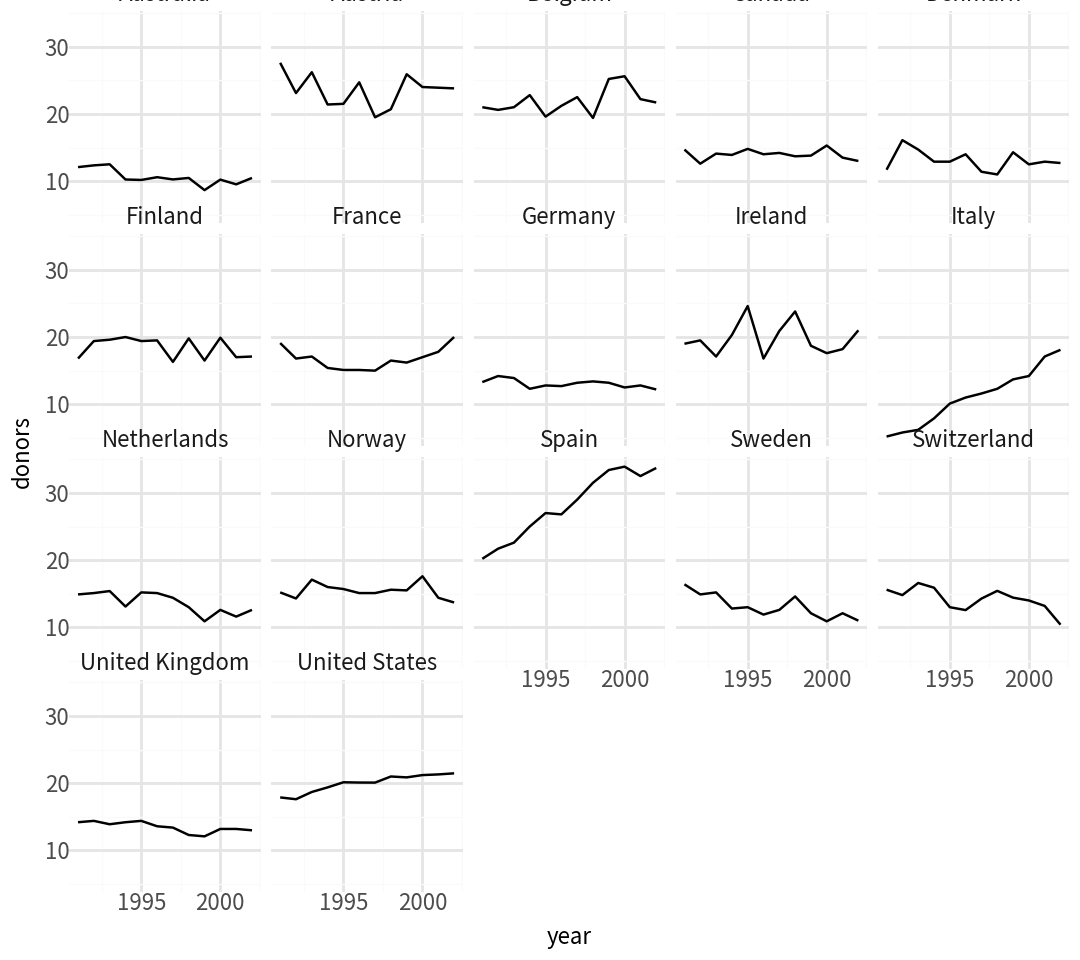

In [39]:
p = ggplot(organdata, aes(x='year', y='donors'))
p + geom_line(
  aes(group='country')
) + facet_wrap(['country']
) + scale_x_date(date_labels='%Y', date_breaks='5 years') + theme(
    text=element_text(size=8)
)

## 図 5.6

注: 原著のオンライン版では軸ラベルが重なってしまっていますが, 紙媒体版では `theme()` 関数で調整しています. この例でも同様にテキストを回転させて調整しています. (**ggplot2** では引数名が `angle` ですが **plotnine** では `rotation` という名前になっているので注意してください)

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


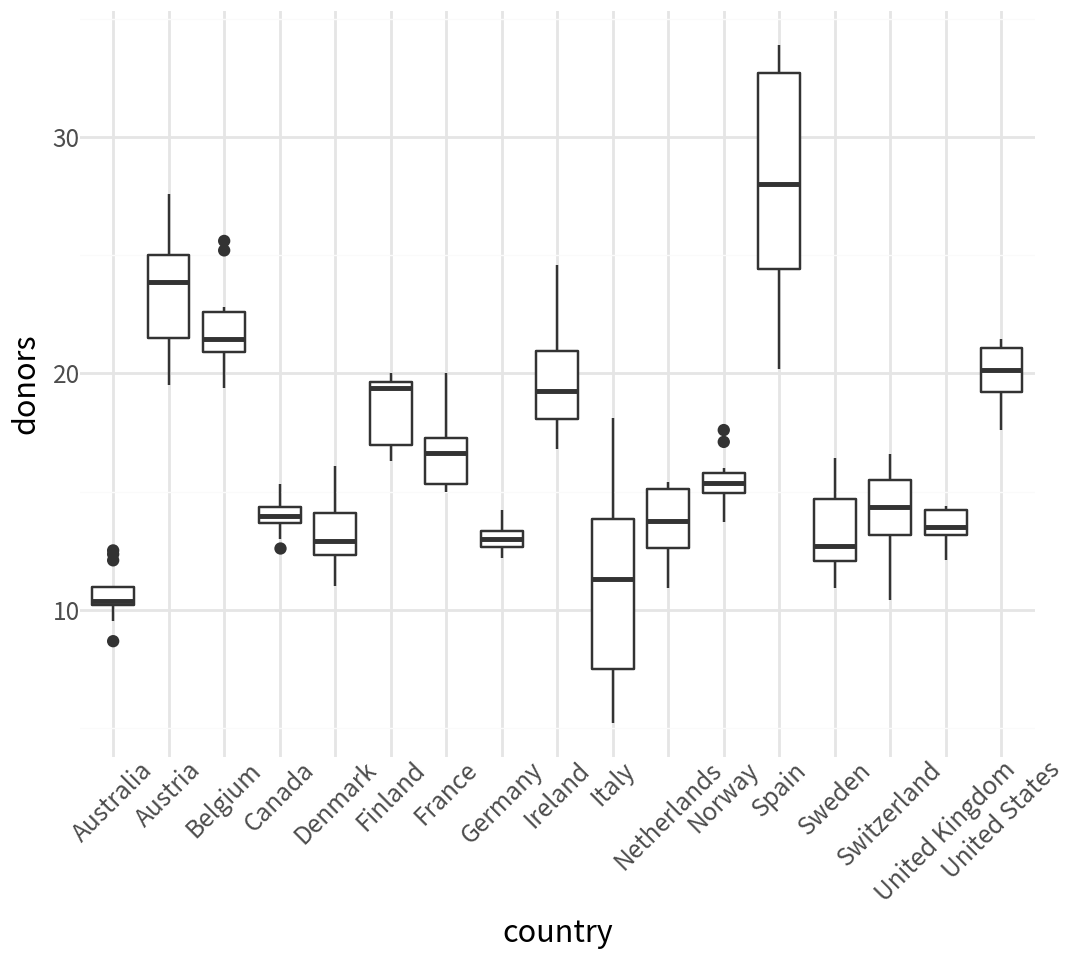

In [40]:
p = ggplot(organdata, aes(x='country', y='donors'))
p + geom_boxplot() + theme(
    axis_text_x=element_text(rotation=45)
)

## 図 5.7

注: 最新版の **ggplot2** (=>3.0.0) では, `coord_flip()` を使う必要はなく `aes()` で x/y軸を逆に指定するだけで反転できます. しかし現時点の (v0.8) **plotnine** にはこの機能はありません.

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


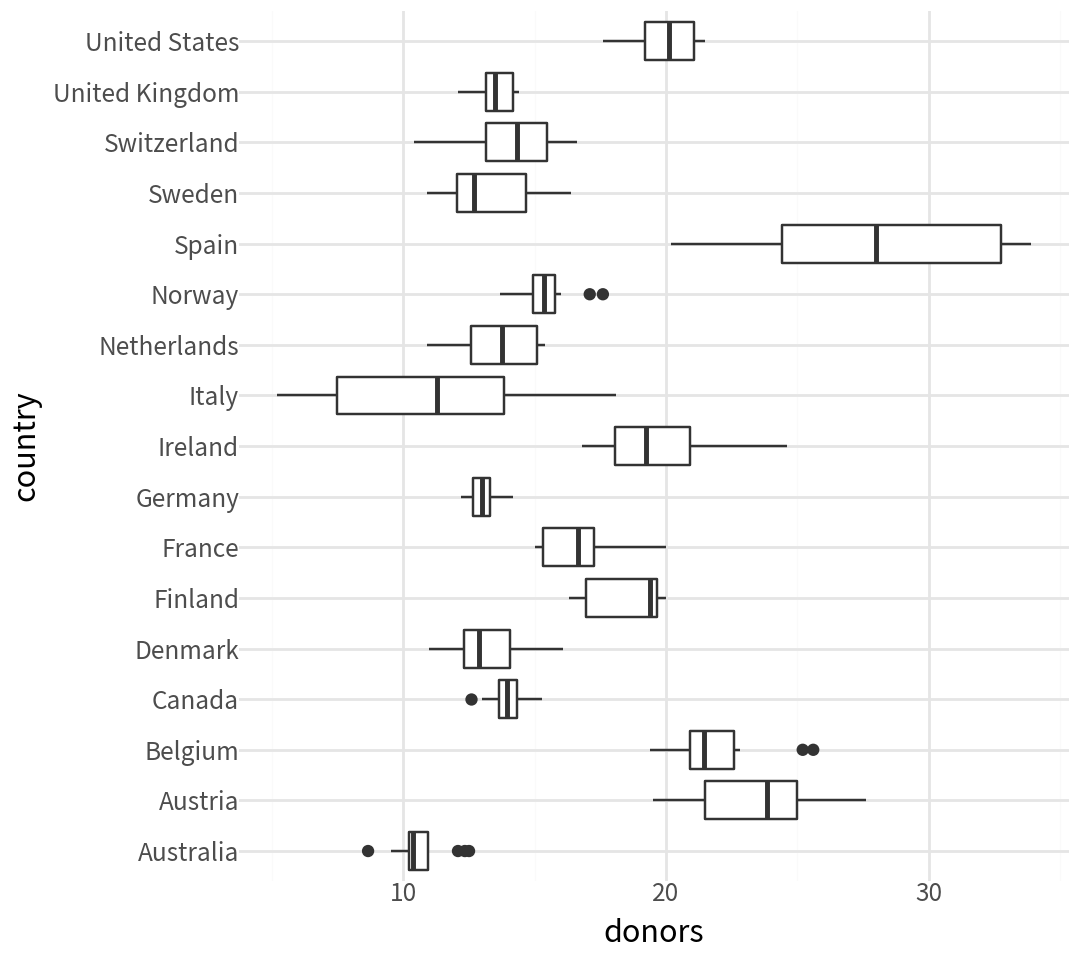

In [41]:
p = ggplot(organdata, aes(x='country', y='donors'))
p + geom_boxplot() + coord_flip()

## 図 5.8

注: **ggplot2** と異なり, **plotnine** の `reorder` 関数にはオプション引数はありません. よって以下のグラフでは, 国の並びが異なっています. 

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


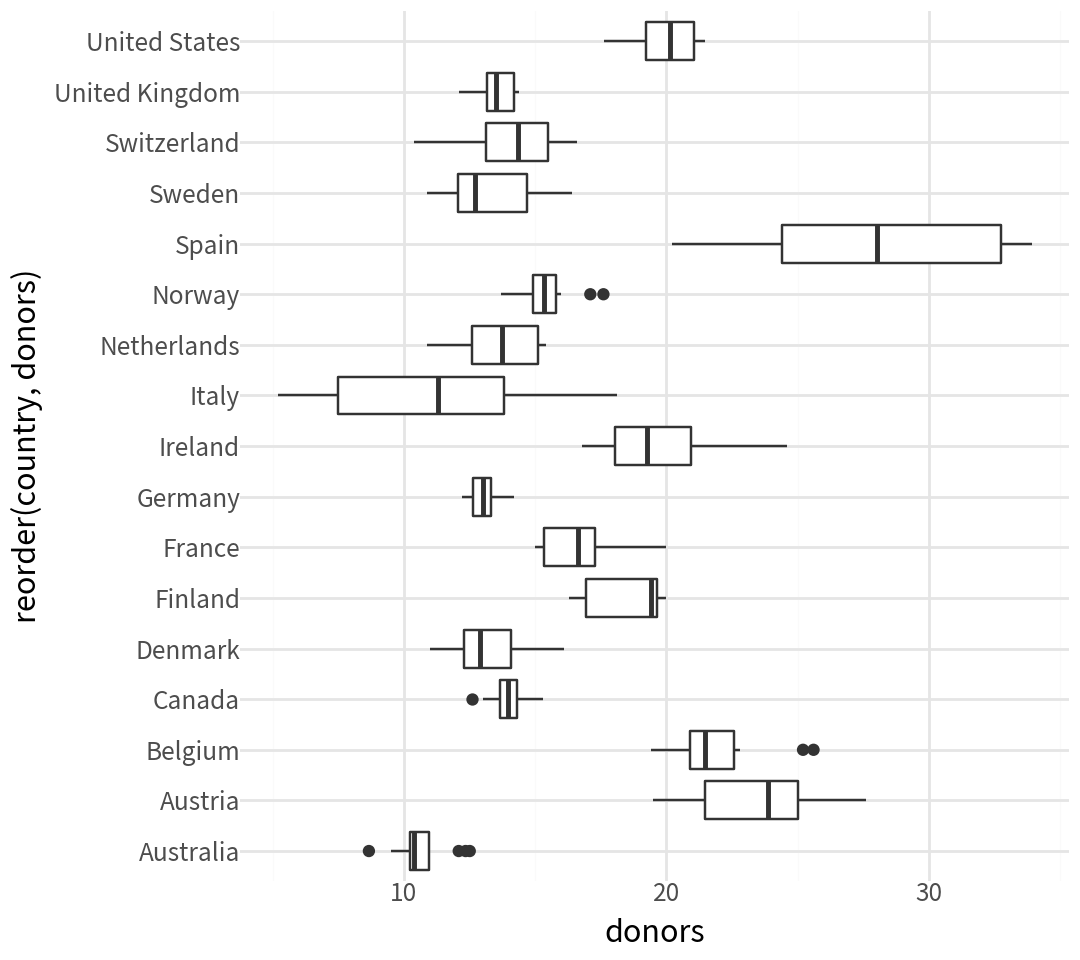

In [42]:
p = ggplot(organdata, aes(x='reorder(country, donors)', y='donors'))
p + geom_boxplot() + labs(x=None) + coord_flip()

そこで, ドナー数の正しい順で並べるために手動で平均値を集計し順位を計算する必要があります.

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


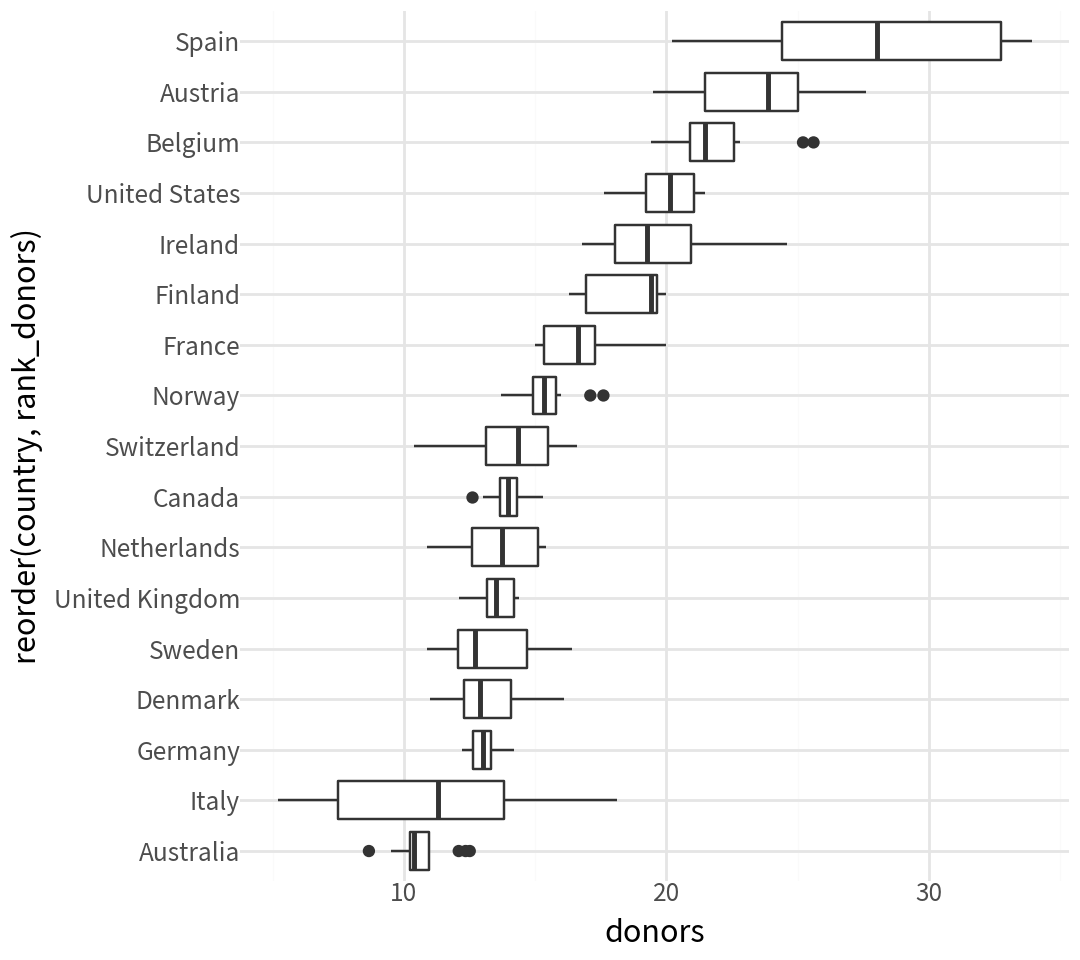

In [43]:
order_countries = organdata.groupby('country')[['donors']].mean(
).sort_values('donors', ascending=True).assign(
    rank_donors=lambda d: range(d.shape[0])
)[['rank_donors']].reset_index()

p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors'))
p + geom_boxplot() + labs(x=None) + coord_flip()

## 図 5.9

In [44]:
# manual color mapping
world_colors = brewer_pal('qualitative', 'Set1')(organdata['world'].unique().shape[0])
world_colors = dict(zip(organdata['world'].unique(), world_colors))
world_colors['NA'] = '#595959'

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


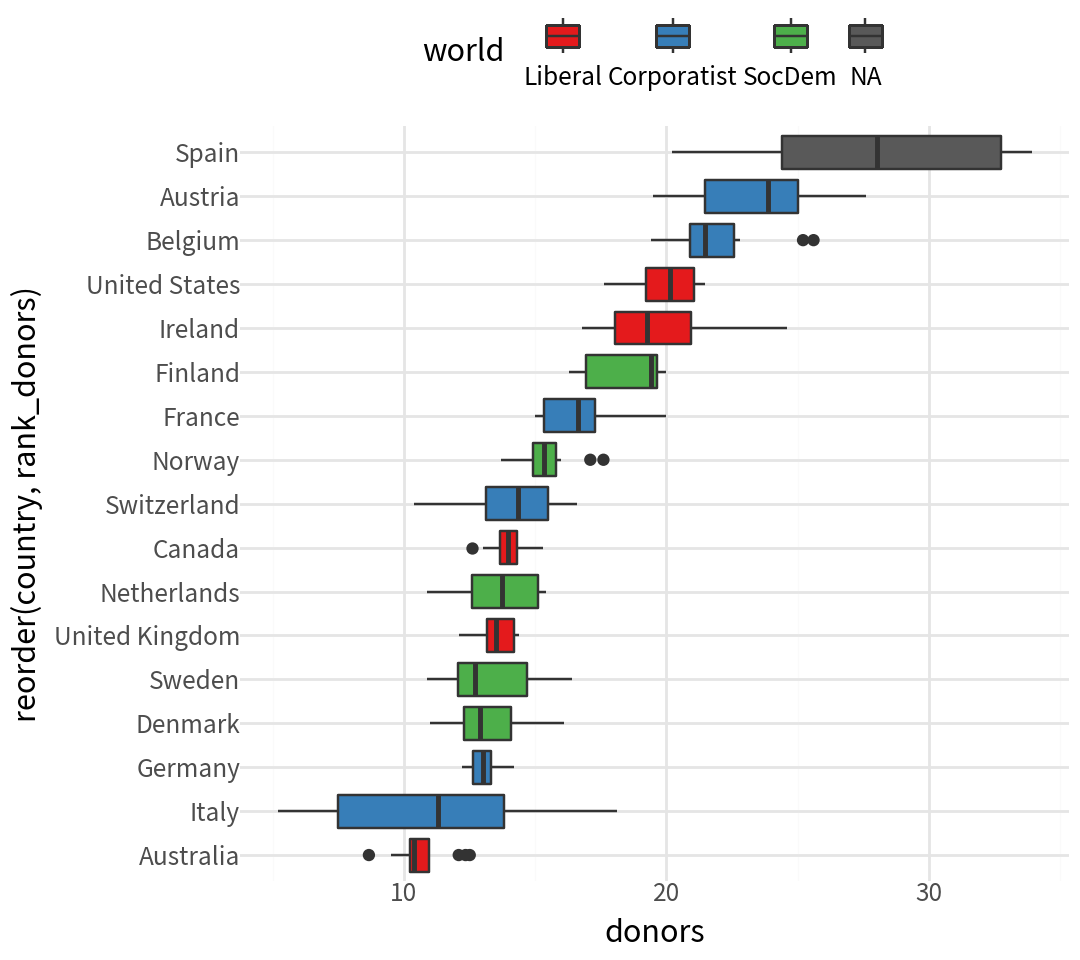

In [45]:
p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', fill='world')
)
p + geom_boxplot() + labs(x=None) + coord_flip(
) + theme(legend_position='top') + scale_fill_manual(world_colors)

## 図 5.10

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


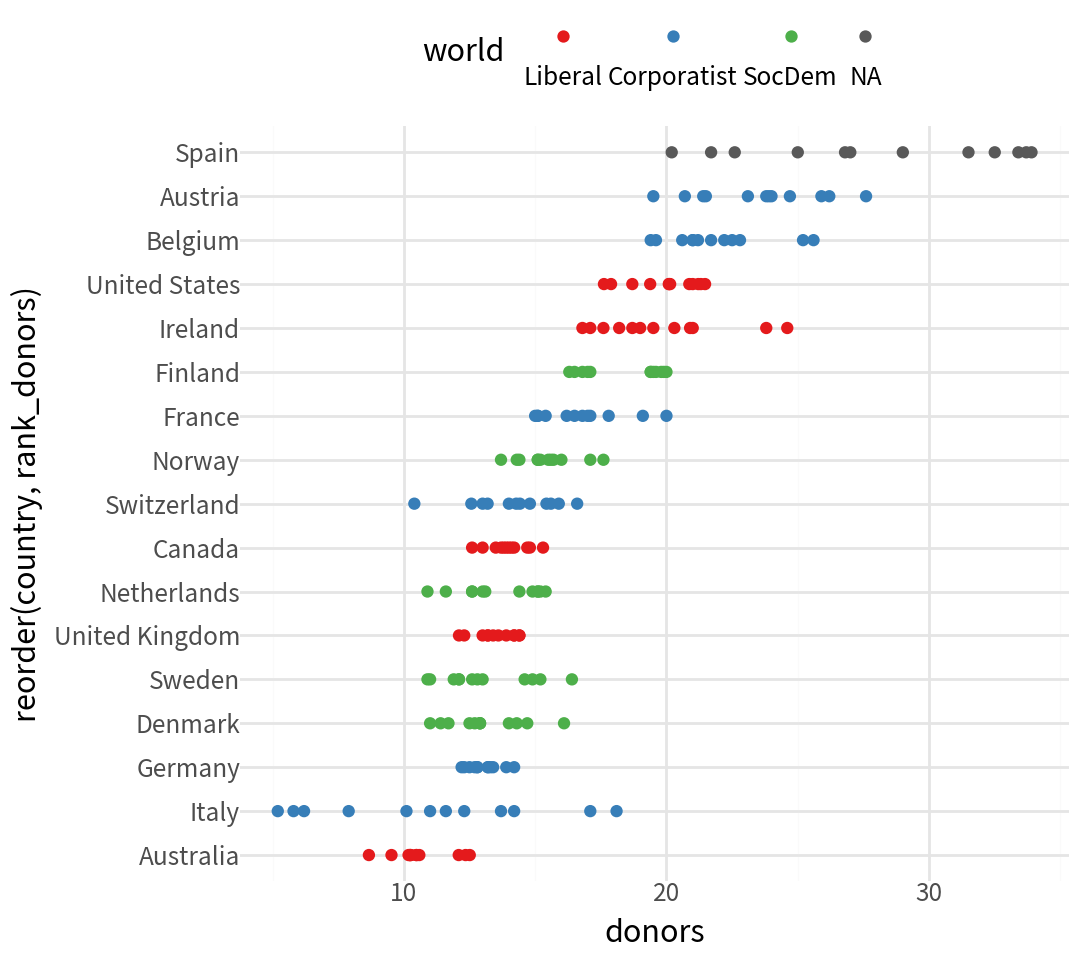

In [46]:
p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', color='world')
)
p + geom_point() + labs(x=None) + coord_flip() + theme(legend_position="top"
) + scale_color_manual(world_colors)

## 図 5.11

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 34 rows containing missing values.


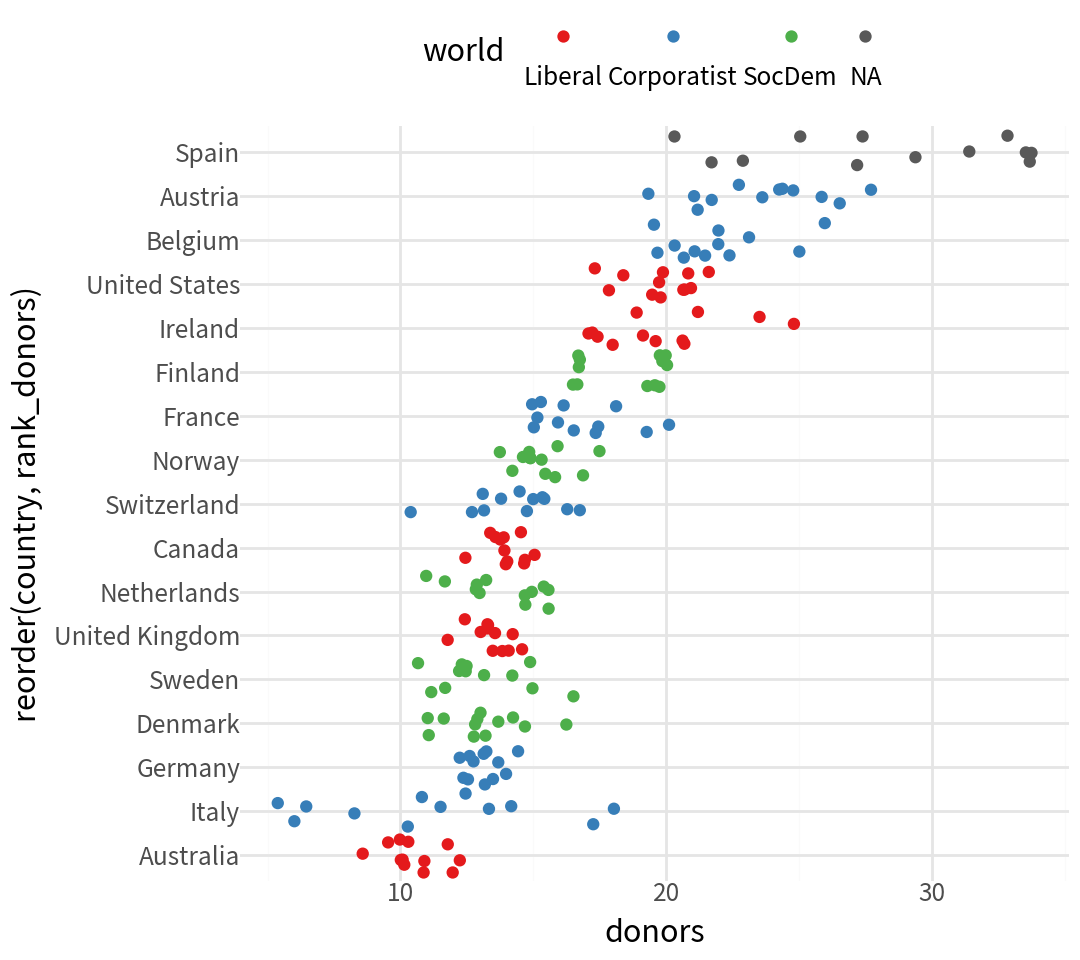

In [47]:
p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', color='world')
)
p + geom_jitter() + labs(x=None) + coord_flip() + theme(legend_position="top"
) + scale_color_manual(world_colors)

## 図 5.12

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 34 rows containing missing values.


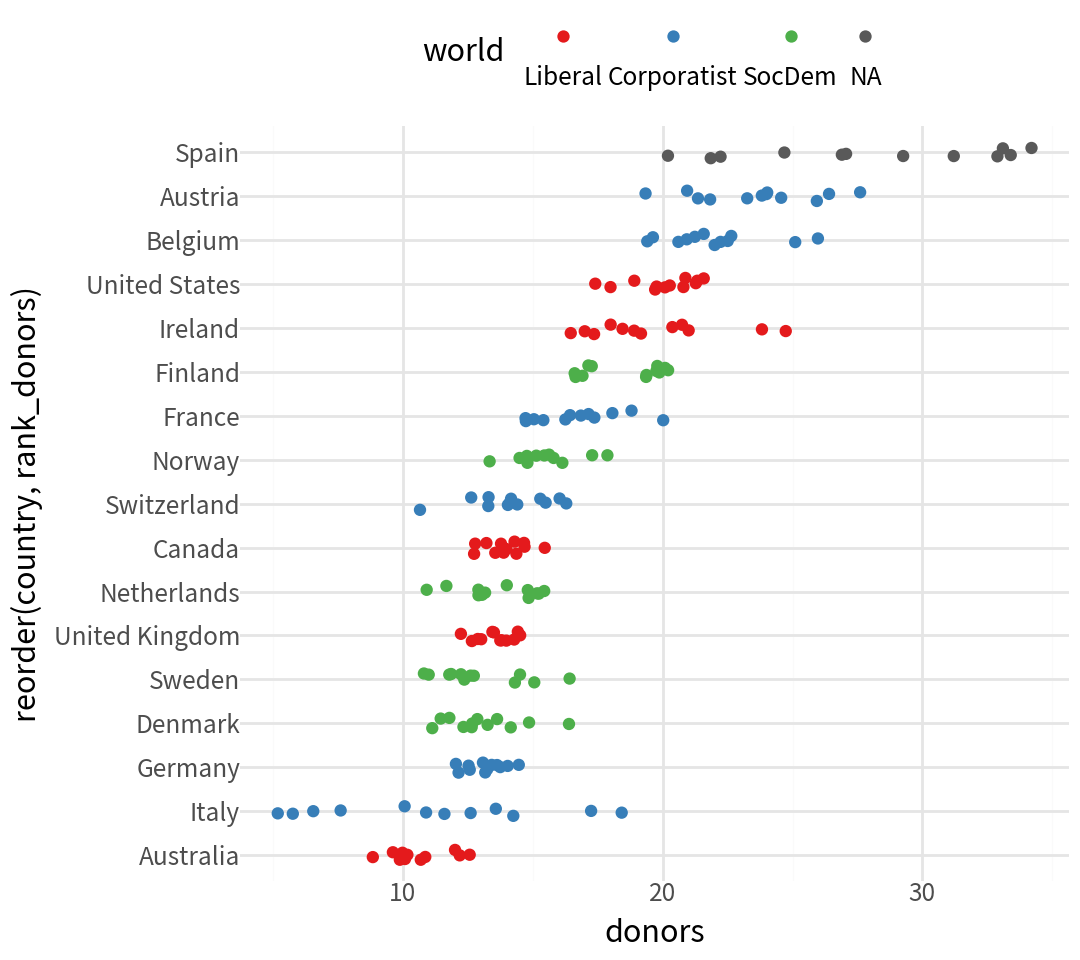

In [48]:
p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', color='world')
)
p + geom_jitter(position=position_jitter(width=0.15)) + labs(
  x=None
) + coord_flip() + theme(legend_position="top"
) + scale_color_manual(world_colors)

## 図 5.13

In [49]:
by_country = organdata[
    [c for c in organdata.columns if c in['consent_law', 'country'] or organdata[c].dtype in [float, int]]
    ].groupby(
  ['consent_law', 'country']).agg(['mean', 'std']
).reset_index()
by_country.columns = [
  '_'.join(filter(lambda x: x !='', t)) for t in by_country.columns
]
by_country = by_country.rename(columns={'donors_std': 'donors_sd'})

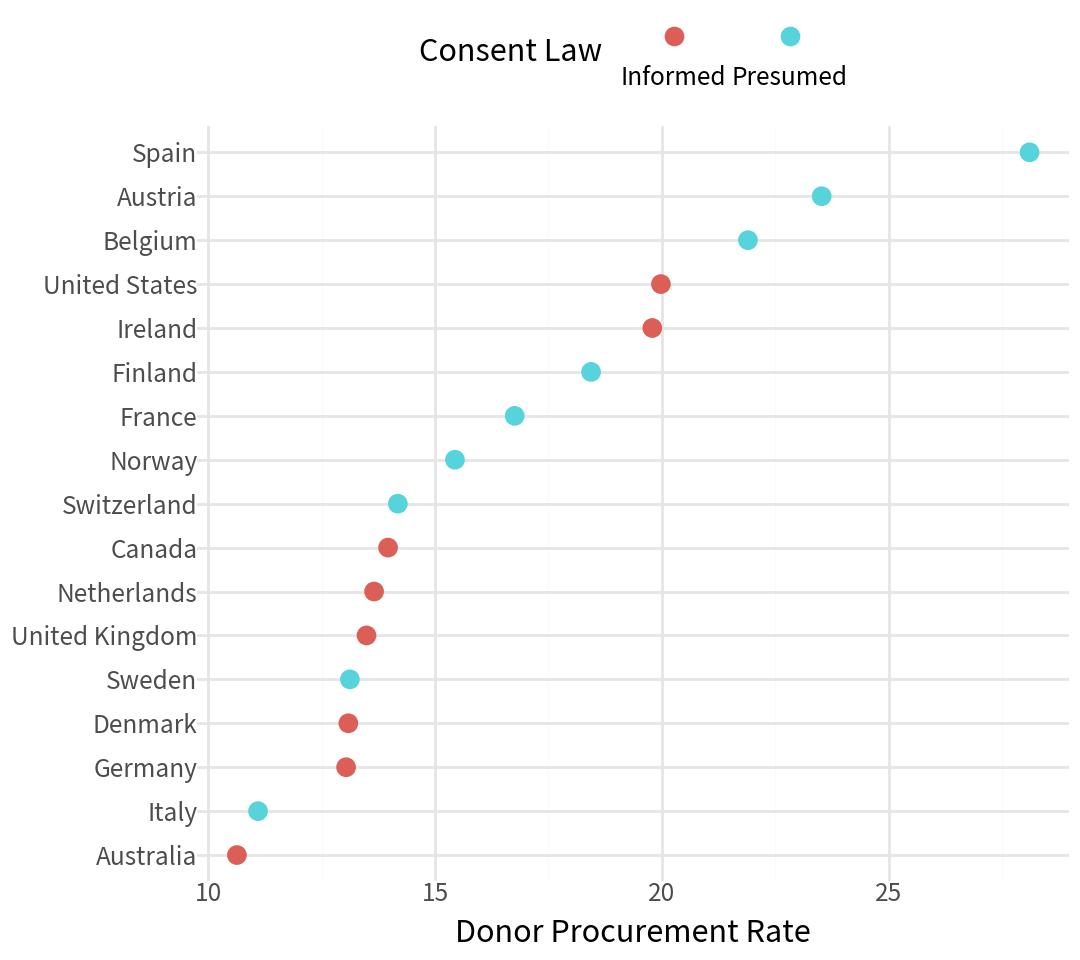

In [50]:
p = ggplot(
  by_country,
  aes(x='donors_mean', y='reorder(country, donors_mean)', color='consent_law')
)
p + geom_point(size=3) + labs(
  x="Donor Procurement Rate",
  y="",
  color="Consent Law"
  ) + theme(legend_position="top")


## 図 5.14

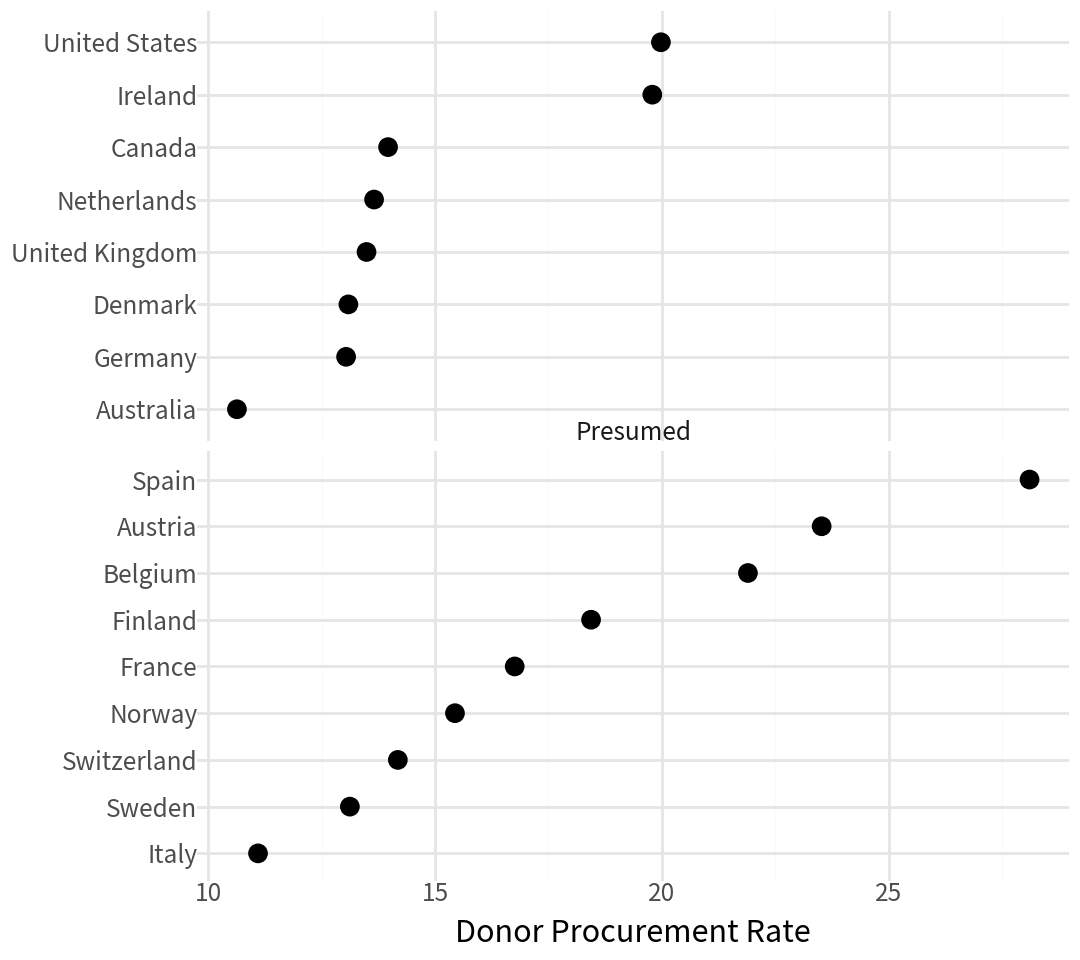

In [51]:
p = ggplot(
    by_country,
    aes(x='donors_mean', y='reorder(country, donors_mean)')
)
p + geom_point(size=3) + facet_wrap(
  'consent_law', scales="free_y", ncol=1
) + labs(
  x="Donor Procurement Rate",
  y=""
)

## 図 5.15

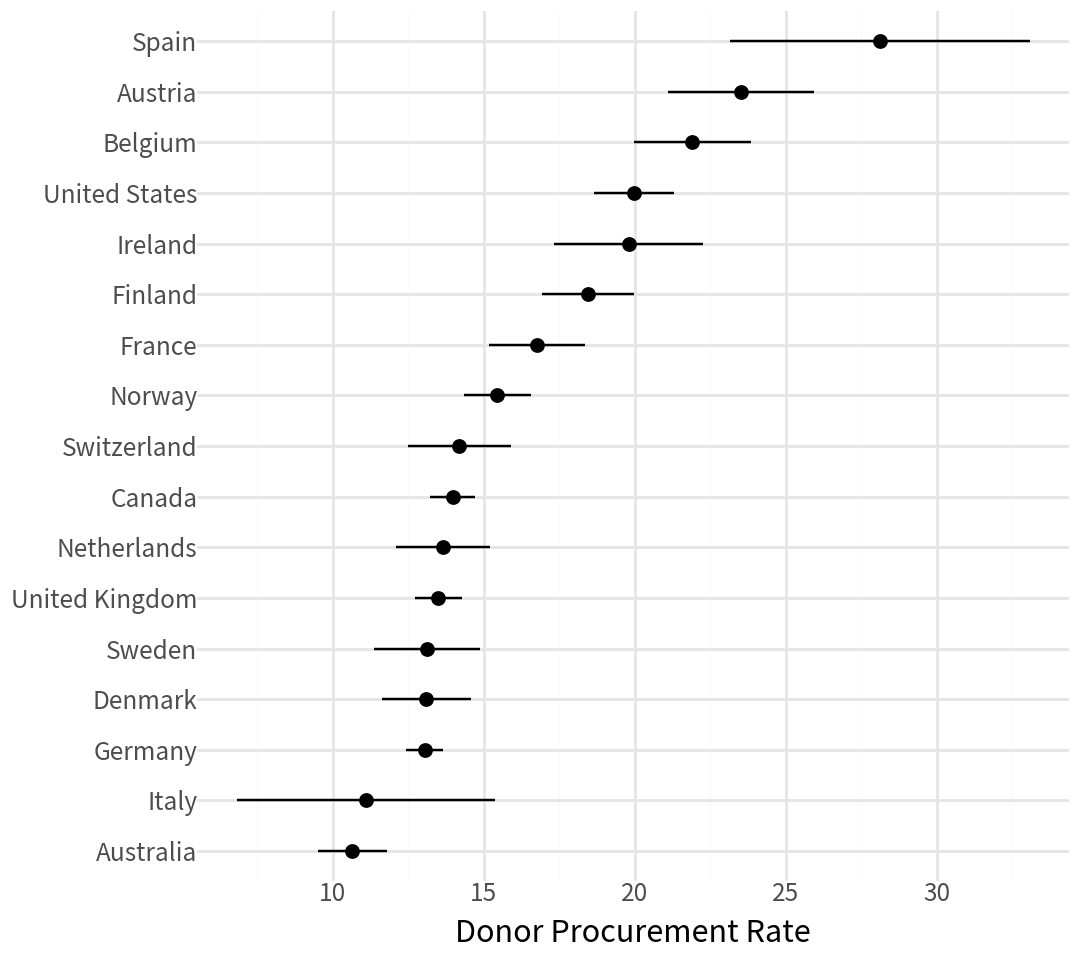

In [52]:
p = ggplot(
    by_country,
    aes(x='reorder(country, donors_mean)', y='donors_mean')
)
p + geom_pointrange(
  aes(ymin='donors_mean - donors_sd',
      ymax='donors_mean + donors_sd')
) + labs(
  x="", y="Donor Procurement Rate") + coord_flip()

## 図 5.16

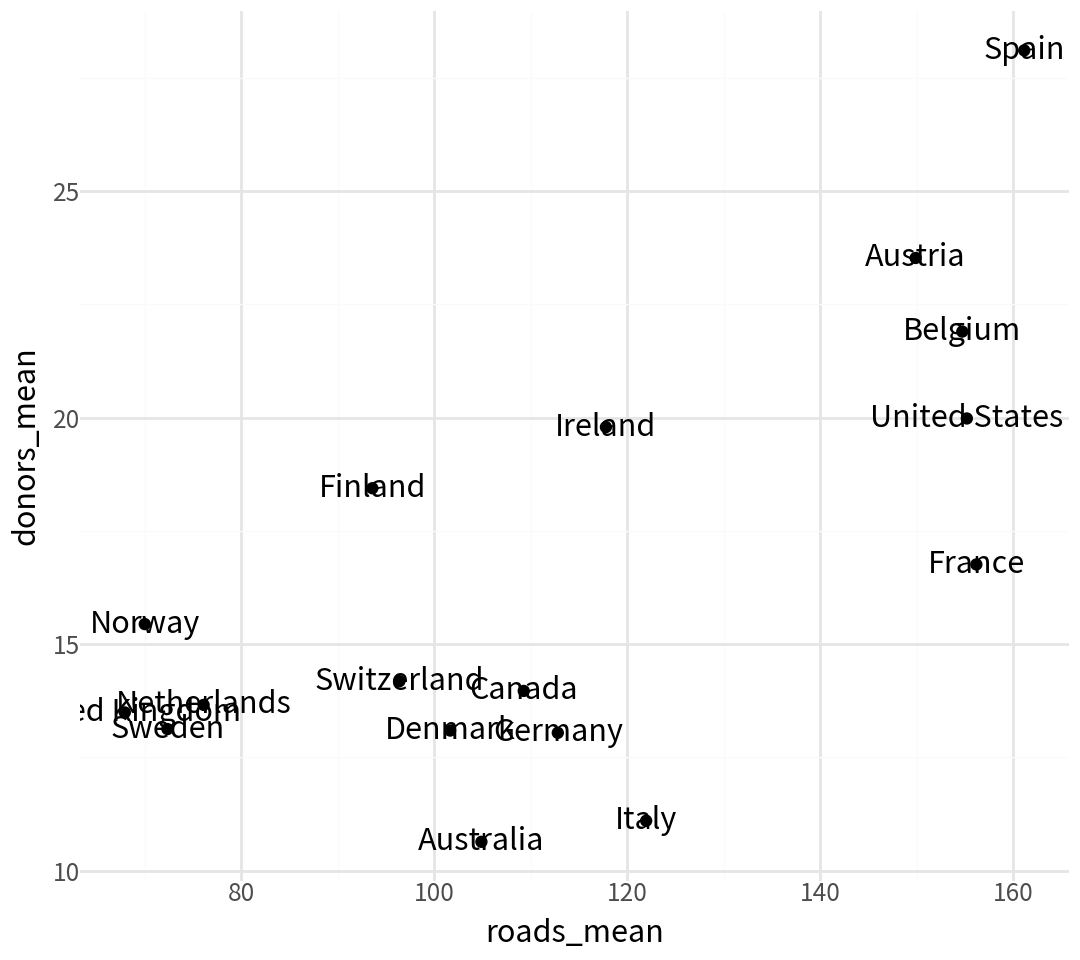

In [53]:
p = ggplot(by_country, aes(x='roads_mean', y='donors_mean'))
p + geom_point() + geom_text(aes(label='country'))

## 図 5.17

注: `hjust` の代わりに `ha` で指定する必要があります. 同様に `vjust` も `va` に置き換える必要があります.

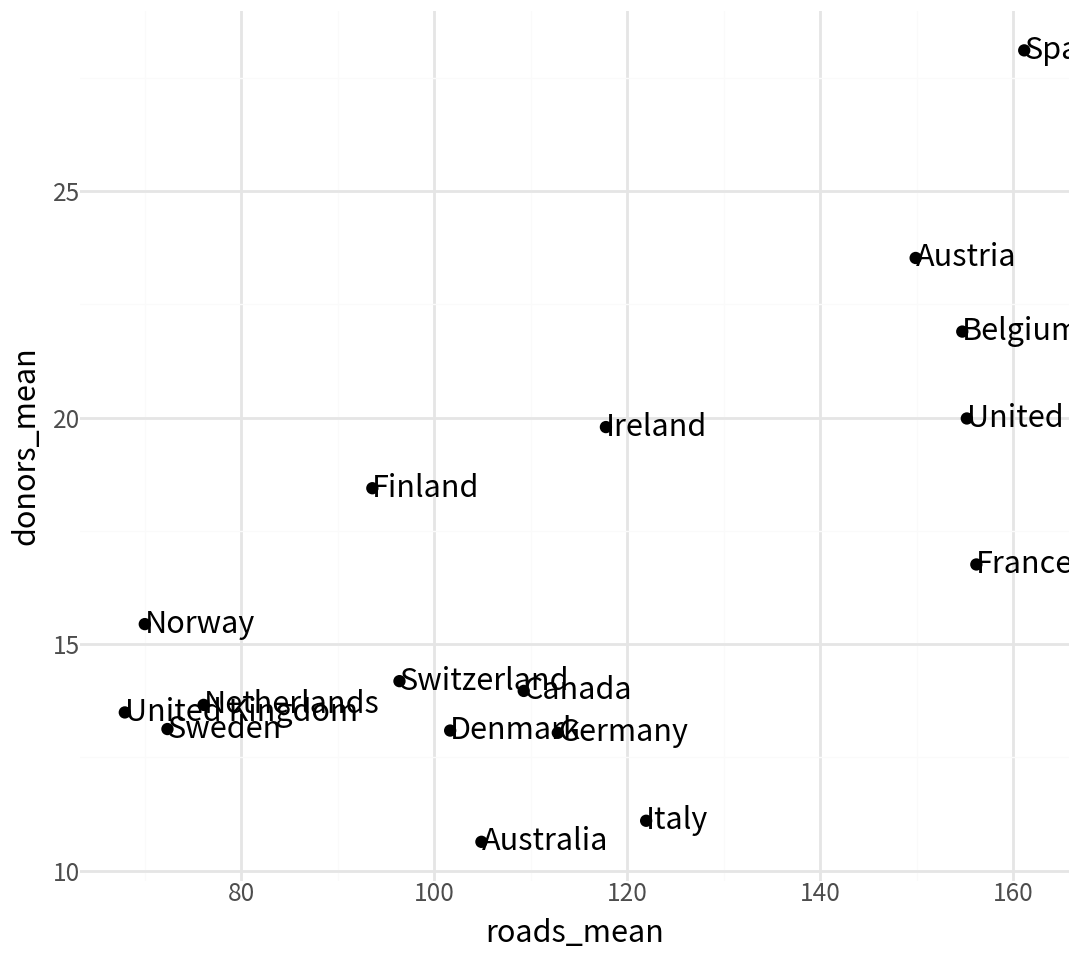

In [54]:
p = ggplot(by_country, aes(x='roads_mean', y='donors_mean'))
p + geom_point() + geom_text(aes(label='country'), ha='left')

## 図 5.18

注: **Plotnine** は現時点 (v0.8) では `ggrepel::geom_text_repel` を使用できません. 代わりに **adjustText** パッケージをインストールし, `adjust_text` 引数を指定することができます. ただしこれは **ggrepel** を完全に代替するものではありません.

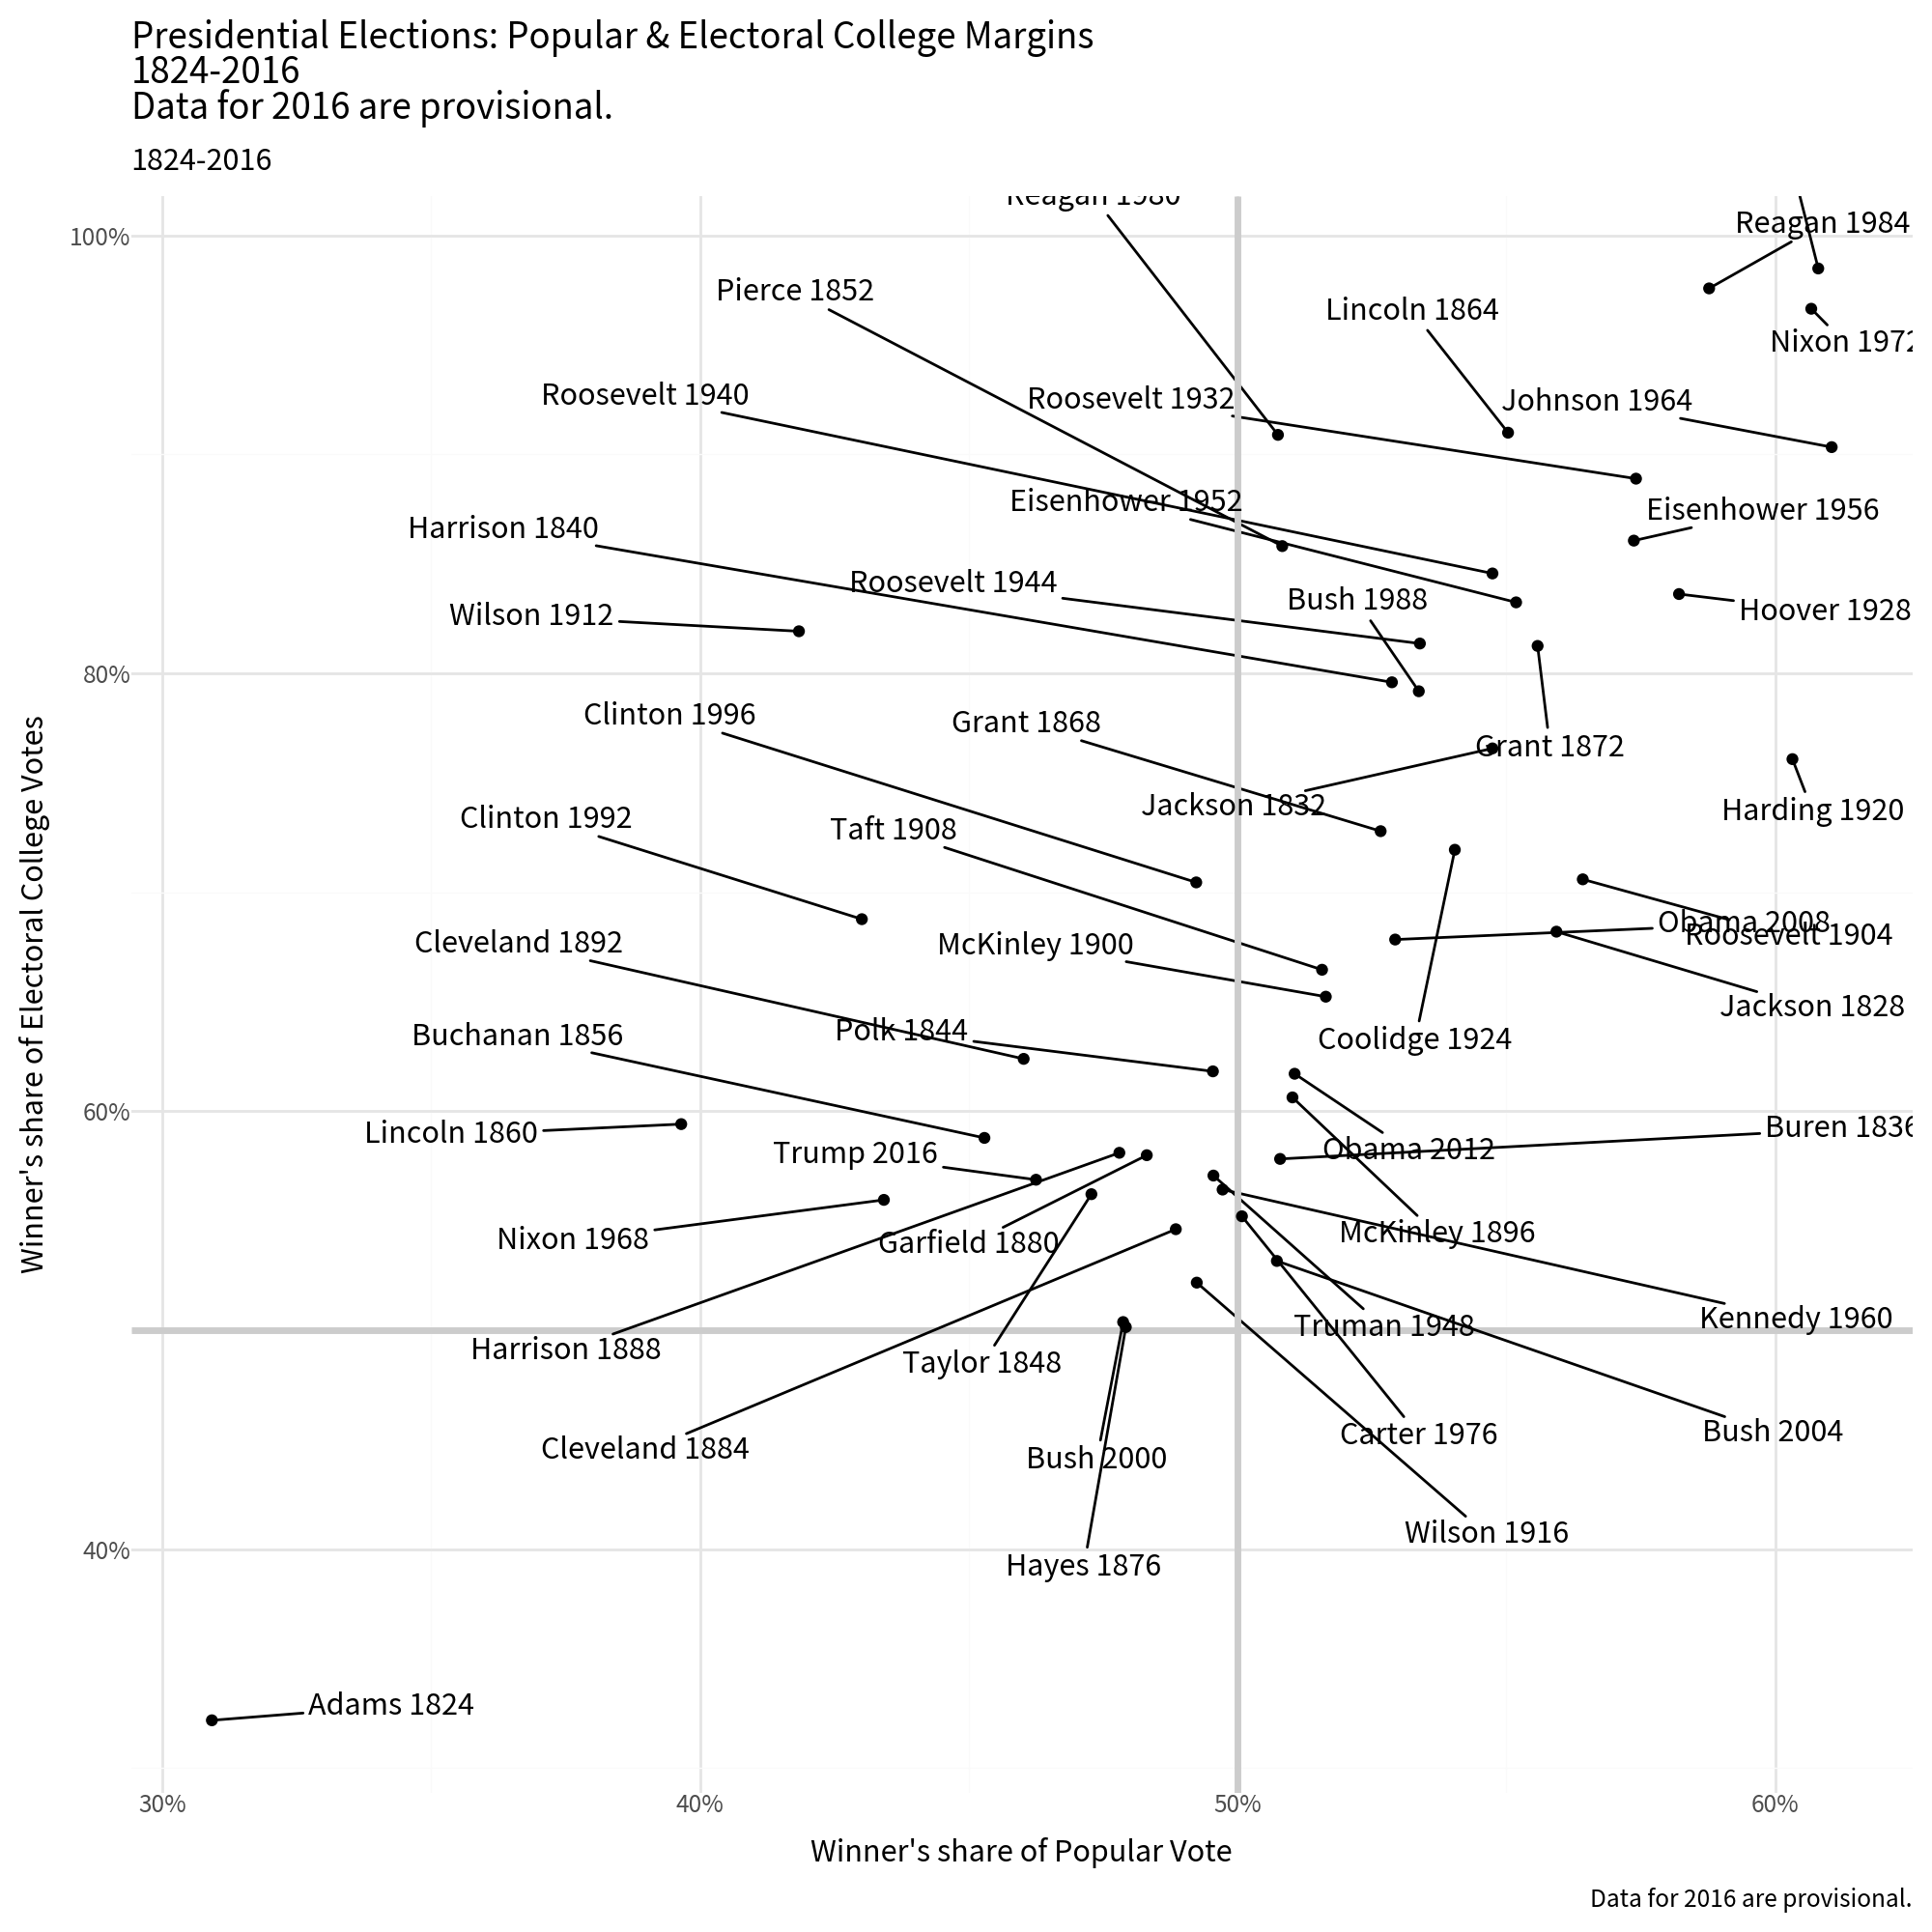

In [55]:
p_title = "Presidential Elections: Popular & Electoral College Margins"
p_subtitle = "1824-2016"
p_caption = "Data for 2016 are provisional."
x_label = "Winner's share of Popular Vote"
y_label = "Winner's share of Electoral College Votes"

p = ggplot(
  elections_historic,
  aes(x='popular_pct', y='ec_pct', label='winner_label')
)
p + geom_hline(
  yintercept=0.5, size=1.4, color=dcolors.get('gray80')
  ) + geom_vline(
    xintercept=0.5, size=1.4, color=dcolors.get('gray80')
  ) + geom_point() + geom_text(
    nudge_x=0.1, nudge_y=0.1, adjust_text={'arrowprops': {'arrowstyle': '-'}}
  ) + scale_x_continuous(
    labels=label_percent()
  ) + scale_y_continuous(
    labels=label_percent()
  ) + labs(
    x=x_label,
    y=y_label,
    title='\n'.join([p_title, p_subtitle, p_caption]),
    subtitle=p_subtitle,
    caption=p_caption
) + theme(figure_size = (10, 10))

## 図 5.19

In [56]:
p = ggplot(by_country, aes(x='gdp_mean', y='health_mean'))
(
  p + geom_point() + geom_text(
    by_country.loc[lambda d: d['gdp_mean'] > 25000],
    aes(label='country')
  )
).draw();

p = ggplot(by_country, aes(x='gdp_mean', y='health_mean'))
(
  p + geom_point(
  ) + geom_text(
    by_country.loc[lambda d: (d['gdp_mean'] > 25000) | (
      d['health_mean'] < 1500
    ) | (d['country'].isin(['Belgium']))],
    aes(label='country'),
    adjust_text={'arrowprops': {'arrowstyle': '-'}}
  )
).draw();

## 図 5.20

In [57]:
organdata = organdata.assign(ind=lambda d: (
  d['ccode'].isin(['Ita', 'Spa'])) & (d['year'].dt.year > 1998))

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


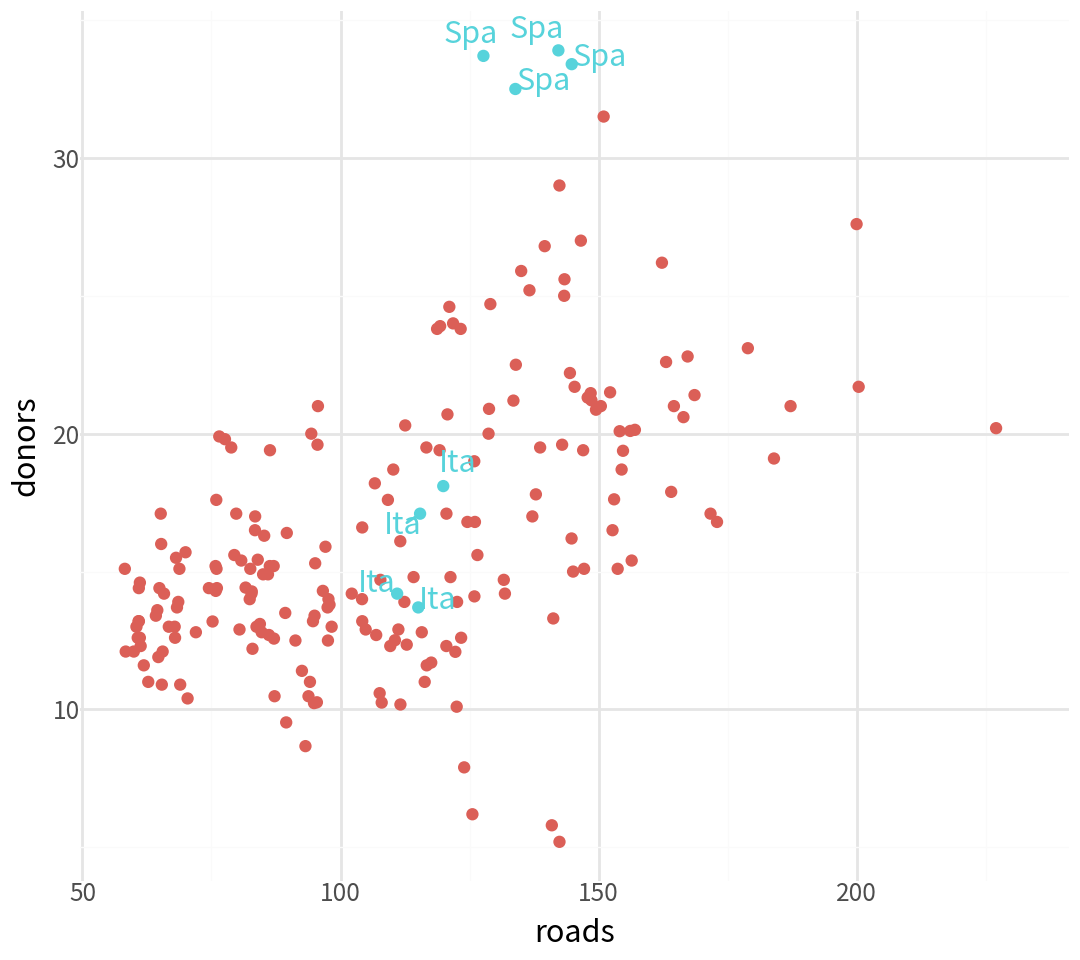

In [58]:
p = ggplot(organdata, aes(x='roads', y='donors', color='ind'))
p + geom_point() + geom_text(
  organdata.loc[lambda d: d['ind']],
  aes(label='ccode'),
  adjust_text={'arrowprops': {'arrowstyle': '-'}}
  ) + guides(
  color=False)

## 図 5.21

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


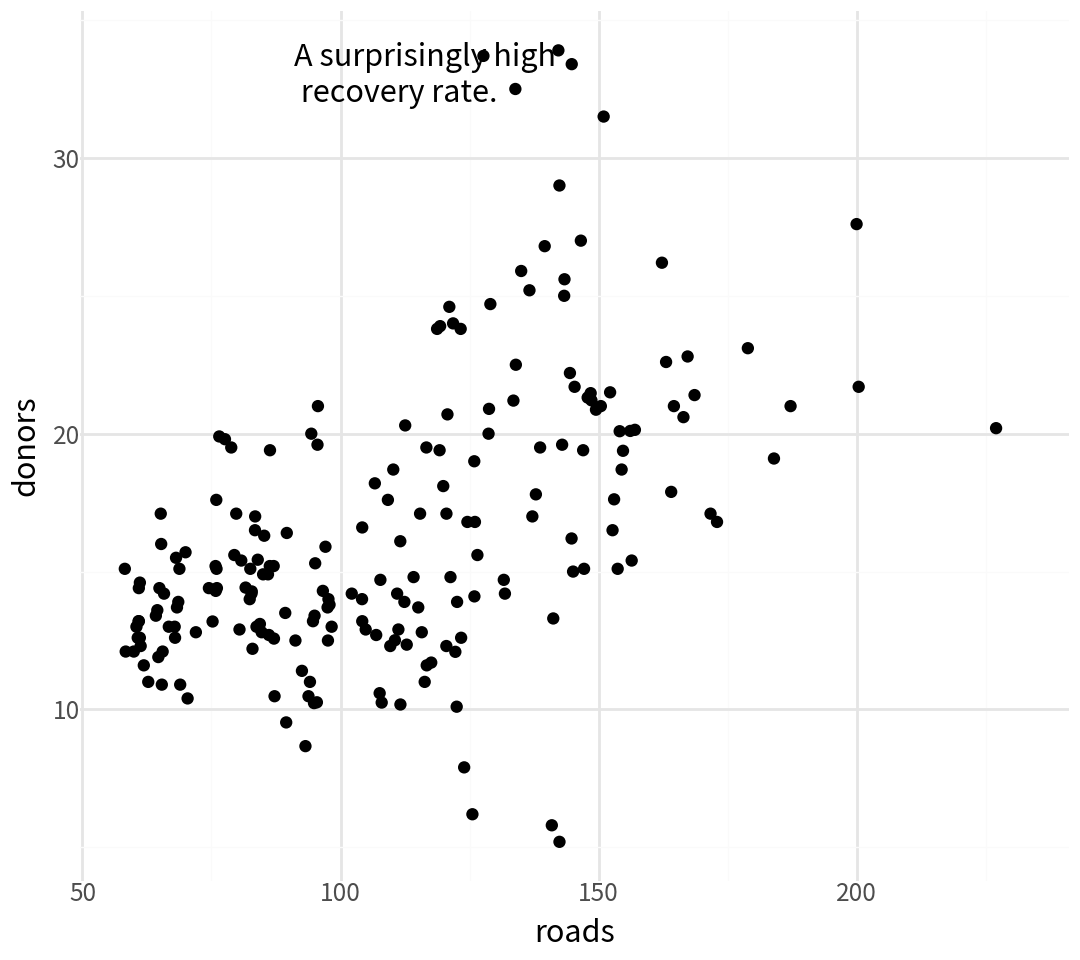

In [59]:
p = ggplot(organdata, aes(x='roads', y='donors'))
p + geom_point(
) + annotate(
  geom="text", x=91, y=33,
  label="A surprisingly high \n recovery rate.",
  ha='left'
)

## 図 5.22

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


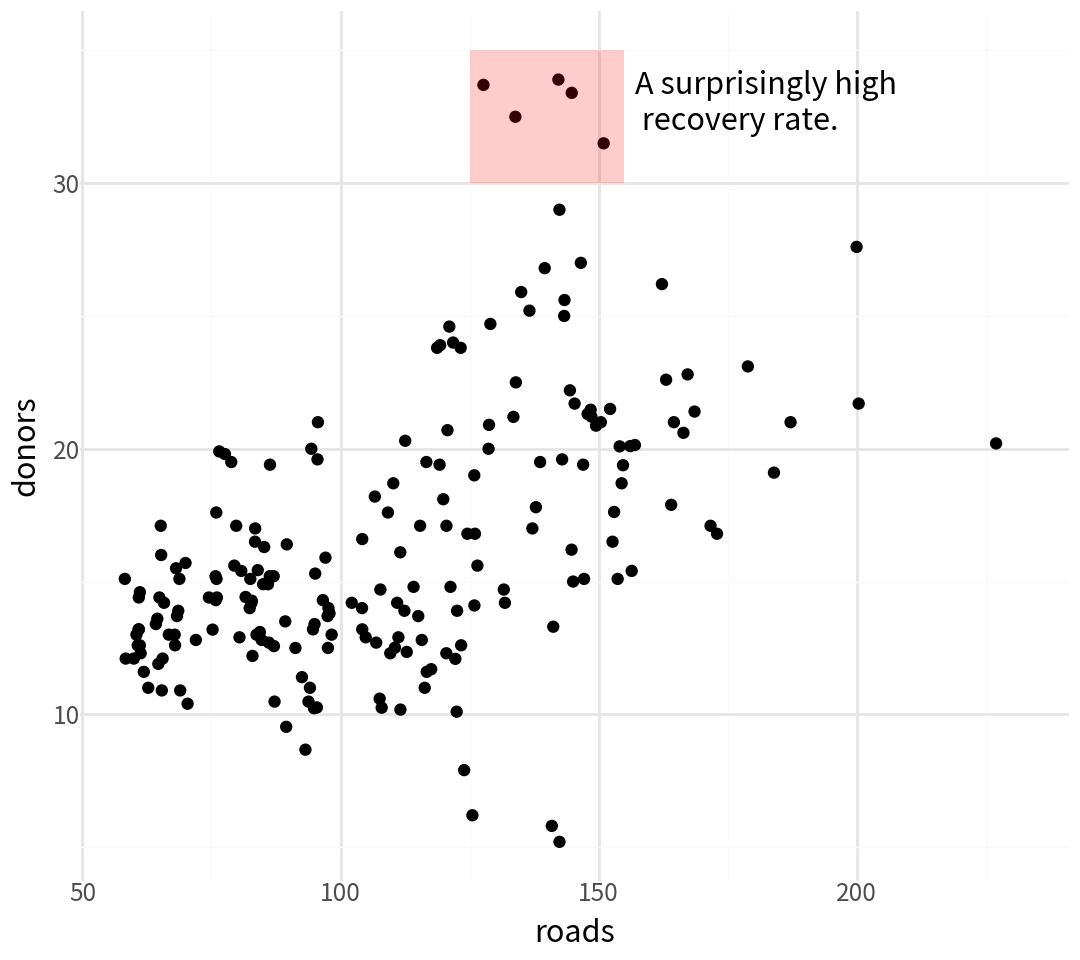

In [60]:
p = ggplot(organdata, aes(x='roads', y='donors'))
p + geom_point() + annotate(
  geom='rect', xmin=125, xmax=155,
  ymin=30, ymax=35, fill='red', alpha=0.2
) + annotate(
  geom='text', x=157, y=33,
  label = "A surprisingly high \n recovery rate.",
  ha = 'left'
)

## 図 5.23

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


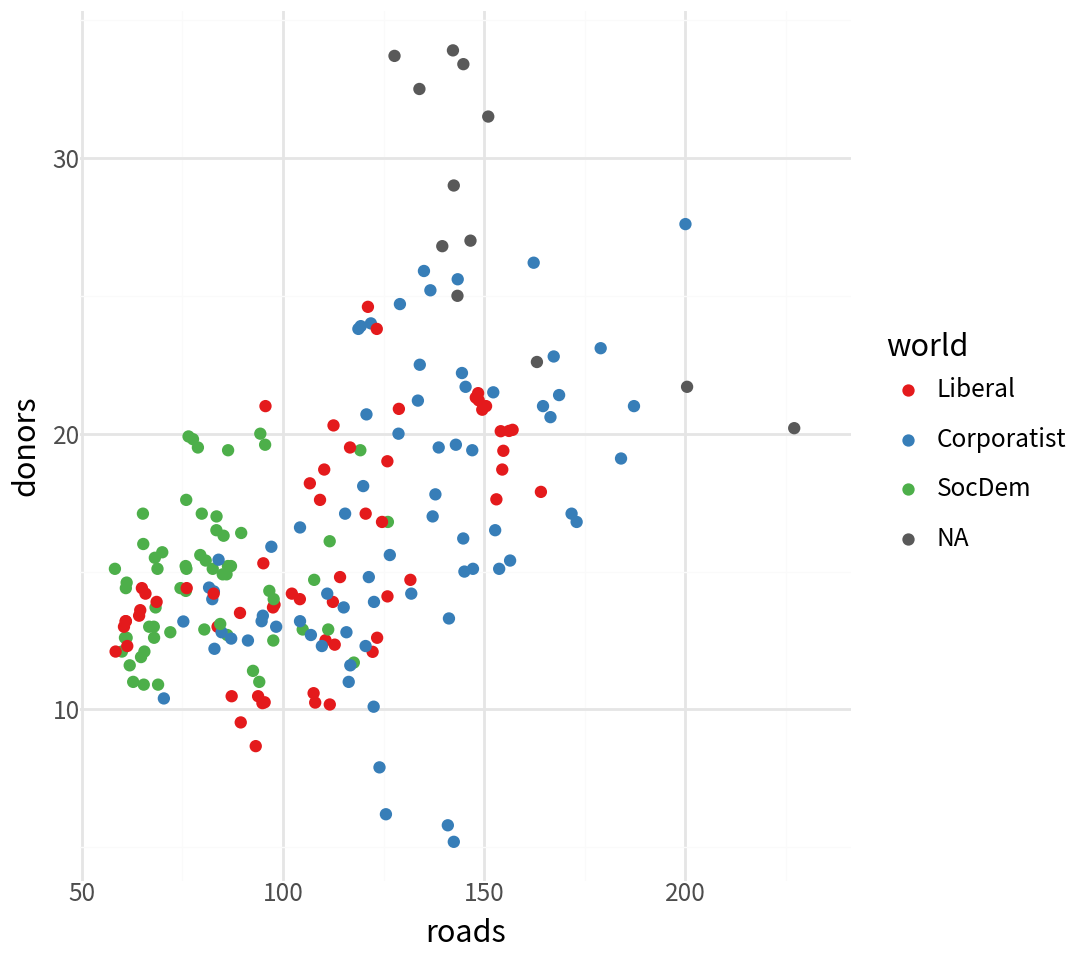

In [61]:
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point() + scale_color_manual(world_colors)

## 図 5.25

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


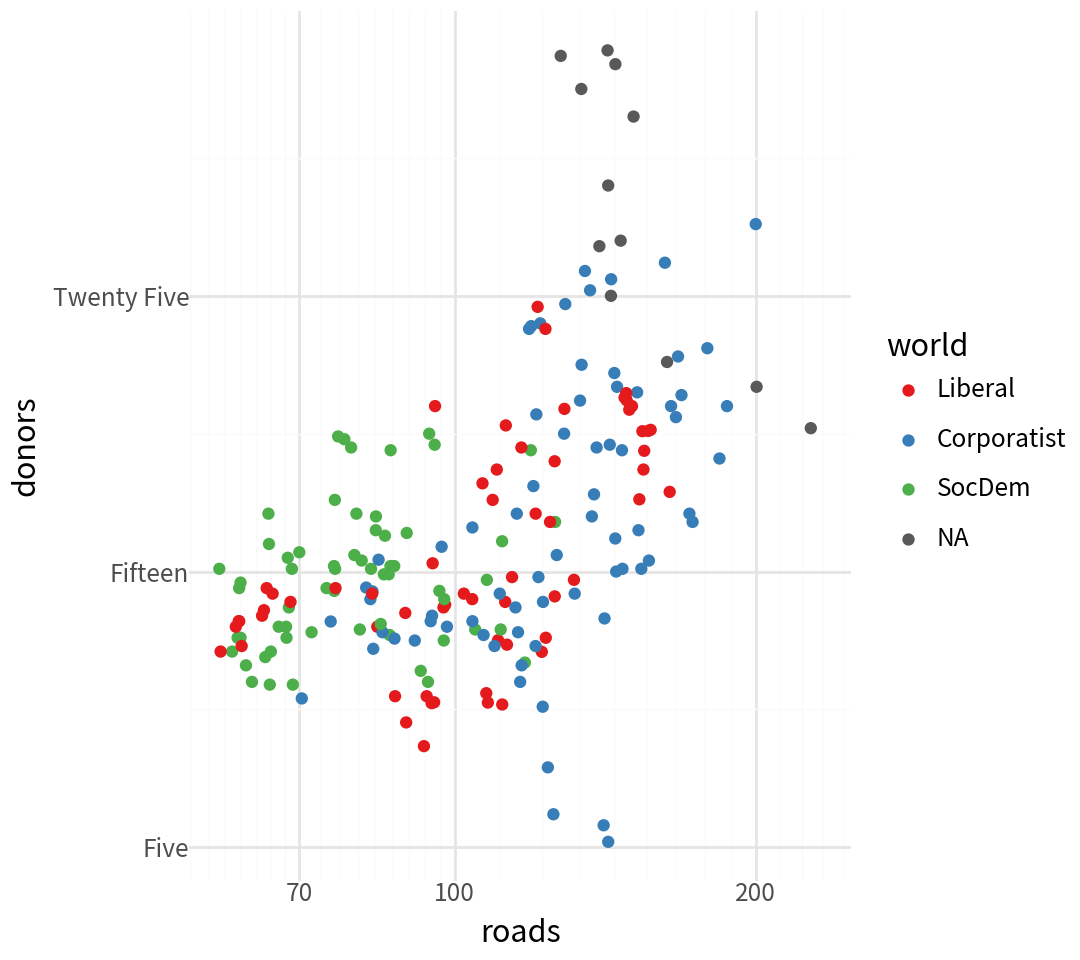

In [62]:
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point() + scale_x_log10(
) + scale_y_continuous(
  breaks = [5, 15, 25],
  labels = ["Five", "Fifteen", "Twenty Five"]
) + scale_color_manual(world_colors)

## 図 5.26

注: これは値とラベルの対応が一貫しないという点で良くないサンプルコードだと思います. そこでデータセットの行の並びと独立するようにディクショナリで指定するよう変更しました.

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


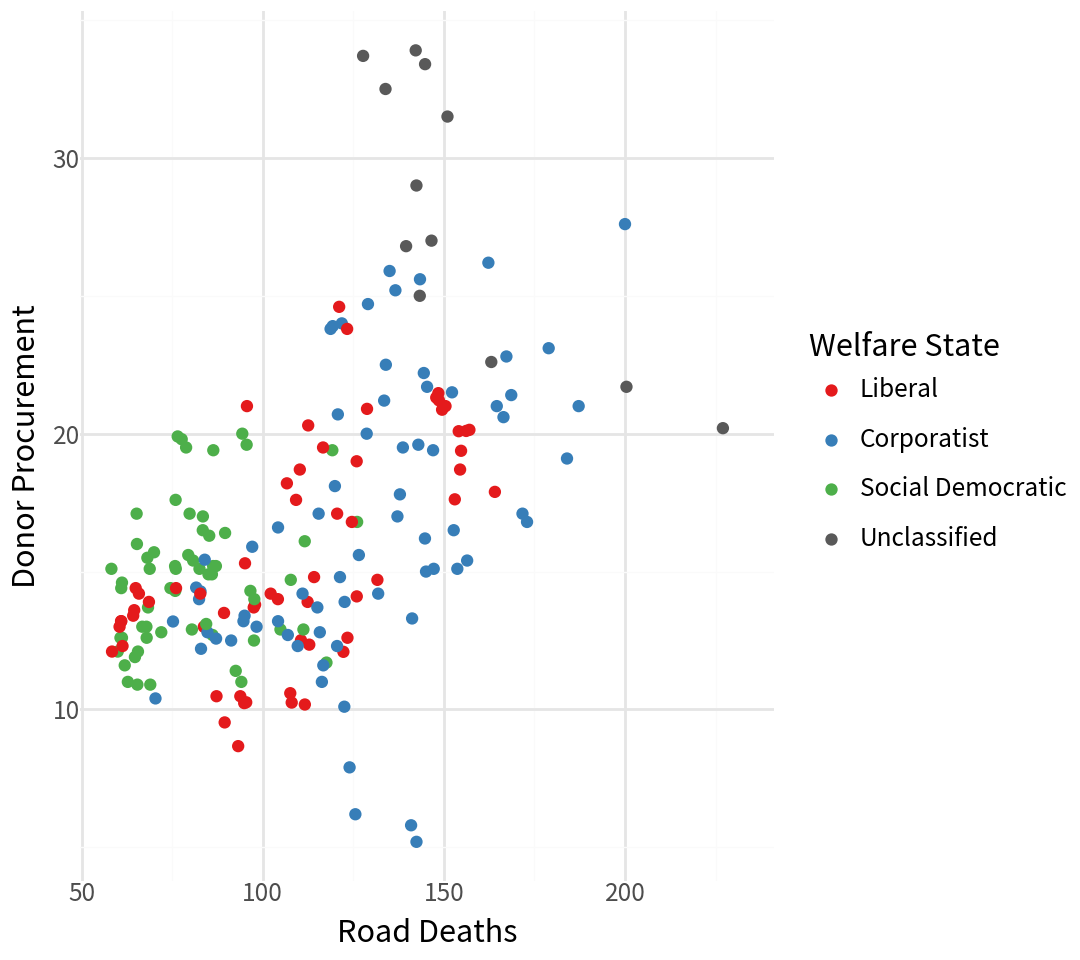

In [63]:
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point() + scale_color_manual(
    world_colors,
    labels = lambda x: [{"Corporatist": "Corporatist",
                         "Liberal": "Liberal",
                         "SocDem": "Social Democratic",
                         "NA": "Unclassified"}[e] for e in x]
) + labs(
  x="Road Deaths",
  y="Donor Procurement",
  color="Welfare State")

## 図 5.27

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


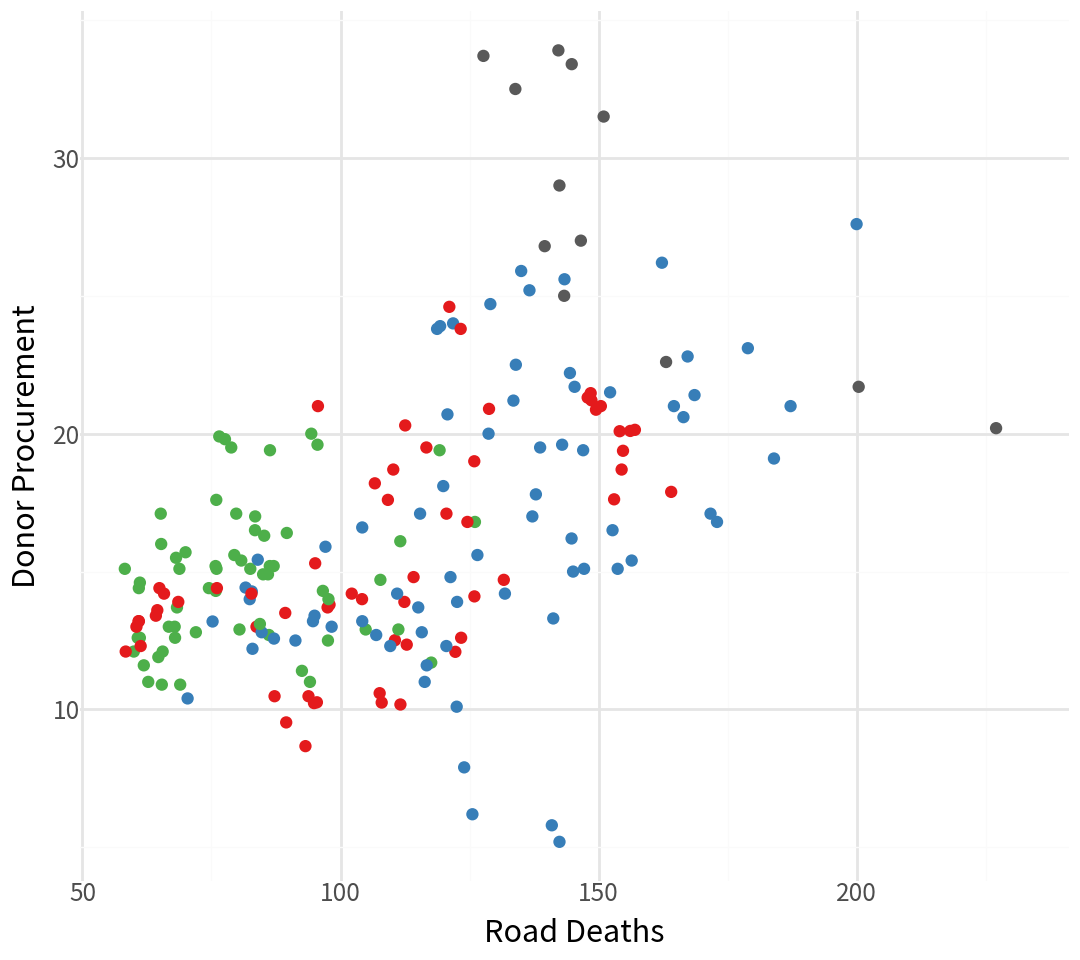

In [64]:
p = ggplot(
  organdata,
  aes(x='roads', y='donors', color='world'))
p + geom_point() + labs(
  x="Road Deaths",
  y="Donor Procurement") + guides(color=False
) + scale_color_manual(world_colors)